## Data Analysis and Visualisation of WeRateDog dataset

In [1]:
#Importing all the required libraries

import requests
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import re
import json
import tweepy

### Gather Data

In [4]:
#Read the dataset

twitter_archive_df= pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
#Gathering data for images

folder_name ='Image_Predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content

with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)



In [7]:
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
image_predictions_df=pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

In [9]:
# Displaying top rows of image predictions dataset

image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#Gathering data from twitter using Twitter APIs

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


In [11]:
tweet_ids = list(twitter_archive_df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        
    except:
        print("Error in: " + str(tweet))
       

Error in: 888202515573088257
Error in: 873697596434513921
Error in: 872668790621863937
Error in: 872261713294495745
Error in: 869988702071779329
Error in: 866816280283807744
Error in: 861769973181624320
Error in: 845459076796616705
Error in: 842892208864923648
Error in: 837012587749474308
Error in: 827228250799742977
Error in: 812747805718642688
Error in: 802247111496568832
Error in: 775096608509886464
Error in: 770743923962707968
Rate limit reached. Sleeping for: 731
Error in: 754011816964026368
Error in: 680055455951884288
Rate limit reached. Sleeping for: 732


In [12]:
# Writing the tweet data into a json file

with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [13]:
with open('tweet_json.txt', 'r') as file:
    data = json.load(file)
    
tweet_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
   # name = data[tweet_id]['name'] # + data[tweet_id]['favourites_count']
    tweet_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
                       # 'name': name})
    
tweets_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df

,tweet_id,retweets,favorites
0,892420643555336193,8210,37666
1,892177421306343426,6072,32355
2,891815181378084864,4015,24372
3,891689557279858688,8368,40965
4,891327558926688256,9067,39178
5,891087950875897856,3010,19700
6,890971913173991426,1988,11518
7,890729181411237888,18238,63520
8,890609185150312448,4130,27089
9,890240255349198849,7128,31047


### Assessing Data

In [14]:
#Making copies

twiiter_archive_df_copy= twitter_archive_df.copy()
image_predictions_df_copy= image_predictions_df.copy()
tweets_df_copy = tweets_df.copy()

In [15]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id     2339 non-null object
retweets     2339 non-null int64
favorites    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [18]:
# Checking for duplicates across all the threee tables
all_columns=pd.Series(list(twitter_archive_df) + list(image_predictions_df) + list(tweets_df))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [19]:
# Checking for total number of missing values against each column
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Cleaning Data

## Tidiness
> 1. tweets_df should be a part of twitter_archive_df table <br>
> 2. There are multiple columns for dog stages which is redundant. We can include all in just one single column.

#### Define
Merge *tweets_df* with *twitter_archive_df* table joining on *tweet id*

#### Code

In [20]:
tweets_df['tweet_id']=tweets_df.tweet_id.astype('int64')

In [21]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id     2339 non-null int64
retweets     2339 non-null int64
favorites    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [22]:
#Merge dataframes on tweet_id
twitter_archive_df=pd.merge(twitter_archive_df,tweets_df, on=['tweet_id','tweet_id'], how='left')

In [23]:
twitter_archive_df=pd.merge(twitter_archive_df,image_predictions_df,on=['tweet_id','tweet_id'], how='left')

#### Test

In [24]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweets                      23

#### Define
Melt the four columns (*doggo, puppo, pupper, floofer*) having information regarding different stages of a dog into a single column *dog_type*

#### Code

In [26]:
# Merging all the dog stages columns to a single column
twitter_archive_df['dog_stage'] = twitter_archive_df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [28]:
twitter_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [30]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
retweets                      2339 non-null float64
favorites                     2339 non-null float64
jpg_url                       2075 non-null object
img_num                       2075 non-null float64
p1                           

In [32]:
twitter_archive_df['dog_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [37]:
twiiter_archive_df_copy.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [34]:
twiiter_archive_df_copy.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [35]:
twiiter_archive_df_copy.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [36]:
twiiter_archive_df_copy.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [38]:
# I am saving the updated data into a csv to avoid running the steps everytime Jupyter notebook is launched.
twitter_archive_df.to_csv('twitter.csv')

In [2]:
twitter_archive_df=pd.read_csv('twitter.csv')

## Quality 

> 1. Drop the columns which does not contribute to our analysis <br>
2. We are looking to deal with information that do not have missing image information, hence any such missing records.<br>
3. Convert inapropriate datatype of timestamp column to the correct one. (from object to datetime type) <br>
4. Capitalize the first letter of Dog names inorder to maintain consistency. <br>
5. There are many unusual dog names like " a,an, this,the" etc which seems like a typo. Hence, we will be removing these names. <br>
6. Changing few column names for better user readability. <br>
7. Optimizing the source types and removing the extra text. <br>
8. Removing null values from retweets.

#### Define
Drop the columns: 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'.

#### Code

In [4]:
drop_columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_archive_df=twitter_archive_df.drop(drop_columns, axis=1)

#### Test

In [5]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 23 columns):
Unnamed: 0            2356 non-null int64
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
retweets              2339 non-null float64
favorites             2339 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-n

#### Define
Remove records with no images

#### Code

In [6]:
# Checking for null values against image URLs
twitter_archive_df.expanded_urls.isnull().sum()

59

In [7]:
twitter_archive_df=twitter_archive_df.dropna(subset=['expanded_urls'])

#### Test

In [8]:
twitter_archive_df.expanded_urls.isnull().sum()
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 23 columns):
Unnamed: 0            2297 non-null int64
tweet_id              2297 non-null int64
timestamp             2297 non-null object
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
retweets              2280 non-null float64
favorites             2280 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-n

#### Define
Convert data type of timestamp from object to datetime

#### Code

In [9]:
twitter_archive_df['timestamp']=pd.to_datetime(twitter_archive_df['timestamp'])

#### Test

In [10]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 23 columns):
Unnamed: 0            2297 non-null int64
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
retweets              2280 non-null float64
favorites             2280 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               20

#### Define
Capitalize the first letter of dog names to maintain consistency.

#### Code

In [11]:
# Find total number of records having the starting alphabet as lower case.
twitter_archive_df['name'].str.islower().sum()

109

In [12]:
twitter_archive_df['name']=twitter_archive_df.name.str.capitalize()

#### Test

In [13]:
twitter_archive_df['name'].str.islower().sum()

0

#### Define
Remove unusual dog names that look more like a typo.

#### Code

In [14]:
twitter_archive_df.name.value_counts()

None        686
A            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Penny        10
Lola         10
Tucker       10
Bo            9
Winston       9
The           8
Sadie         8
Toby          7
An            7
Buddy         7
Bailey        7
Daisy         7
Leo           6
Milo          6
Dave          6
Rusty         6
Oscar         6
Jax           6
Jack          6
Koda          6
Scout         6
Stanley       6
Bella         6
Chester       5
           ... 
Willie        1
Joey          1
Poppy         1
Henry         1
Buddah        1
Zeek          1
Sully         1
Evy           1
Benny         1
Beebop        1
Jangle        1
Trevith       1
Snickers      1
Mauve         1
Brooks        1
Schnozz       1
Perry         1
Burt          1
Tripp         1
Bradlay       1
Kevon         1
Aqua          1
Steve         1
Tuck          1
Stefan        1
Edgar         1
Ito           1
Chef          1
Chesney       1
Raphael       1
Name: name, Length: 957,

In [15]:
# Removing the most frequently seen dog name typos
remove_list = ['A','The','An','This','O']
for r in remove_list:
        twitter_archive_df['name'].replace(r, 'None', inplace=True)

#### Test

In [16]:
twitter_archive_df.name.value_counts()

None            758
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
Buddy             7
Bailey            7
Daisy             7
Toby              7
Oscar             6
Bella             6
Stanley           6
Dave              6
Jack              6
Milo              6
Leo               6
Jax               6
Koda              6
Scout             6
Rusty             6
Oakley            5
Alfie             5
Larry             5
Chester           5
               ... 
General           1
Bobbay            1
Saydee            1
Dante             1
Filup             1
Maxwell           1
Ricky             1
Batdog            1
Nida              1
Darby             1
Tebow             1
Christoper        1
Cleopatricia      1
Vinnie            1
Jersey            1
Buckley           1
Harvey            1
Brandy            1
Ambrose           1


#### Define
Correct column names like p1,p2,p3 etc for better user readability.

#### Code

In [17]:
# Renaming columns 
twitter_archive_df.rename(columns={'p1': 'First Prediction', 'p2' : 'Second Prediction', 'p1_conf' : 'Confidence of 1st prediction',
                                   'p2_conf' : 'Confidence of 2nd prediction', 'p1_dog' : 'First_Breed','p2_dog' : 'Second_Breed',
                                   'p3' : 'Third Prediction', 'p3_conf' : 'Confidence of 3rd prediction', 'p3_dog' : 'Third Breed'}
                                   , inplace=True)

#### Test

In [18]:
twitter_archive_df.head(5)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweets,...,First Prediction,Confidence of 1st prediction,First_Breed,Second Prediction,Confidence of 2nd prediction,Second_Breed,Third Prediction,Confidence of 3rd prediction,Third Breed,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8210.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None
1,1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6072.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None
2,2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4015.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None
3,3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8368.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,None
4,4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9067.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None


#### Define
Optimize source types

#### Code

In [19]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2163
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
#Replacing extra text 
twitter_archive_df['source'] = twitter_archive_df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iPhone')
twitter_archive_df['source'] = twitter_archive_df['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')

twitter_archive_df['source'] = twitter_archive_df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')

twitter_archive_df['source'] = twitter_archive_df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### Test

In [21]:
twitter_archive_df['source'].value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

#### Define
Remove nulls from retweets.

#### Code

In [22]:
twitter_archive_df=twitter_archive_df.dropna(subset=['retweets'])

#### Test

In [23]:
twitter_archive_df.retweets.isnull().sum()

0

In [24]:
twitter_archive_df.favorites.isnull().sum()

0

In [25]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 0 to 2355
Data columns (total 23 columns):
Unnamed: 0                      2280 non-null int64
tweet_id                        2280 non-null int64
timestamp                       2280 non-null datetime64[ns]
source                          2280 non-null object
text                            2280 non-null object
expanded_urls                   2280 non-null object
rating_numerator                2280 non-null int64
rating_denominator              2280 non-null int64
name                            2280 non-null object
retweets                        2280 non-null float64
favorites                       2280 non-null float64
jpg_url                         2066 non-null object
img_num                         2066 non-null float64
First Prediction                2066 non-null object
Confidence of 1st prediction    2066 non-null float64
First_Breed                     2066 non-null object
Second Prediction               2066 

In [26]:
# Saving the clean dataset
twitter_archive_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualising Data insights

Which is the most dominant Source type?

Text(0.5,1,'Which is the most dominant source type')

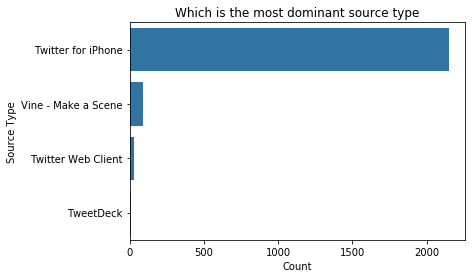

In [27]:
plt.figsize=[11,5]
base_color = sb.color_palette()[0]
cat_order = twitter_archive_df['source'].value_counts().index
sb.countplot(data = twitter_archive_df, y= 'source', color = base_color, order = cat_order)
plt.xlabel('Count')
plt.ylabel('Source Type')
plt.title('Which is the most dominant source type')

From above graph we can see that mostly data is gathered from Twitter or iPhone.

How does the correlation between retweets and favorites look?

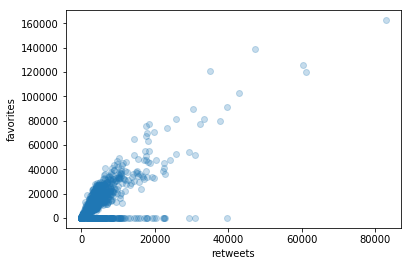

In [28]:
sb.regplot(x="retweets", y="favorites", data=twitter_archive_df, fit_reg=False, x_jitter = 0.4, y_jitter = 0.4, scatter_kws = {'alpha' : 1/4})

The correlation between retweets and favourites look like a positive correlation.

In [30]:
twitter_archive_df.rating_numerator.value_counts()

12      543
11      455
10      453
13      332
9       155
8       102
7        53
14       47
5        35
6        32
3        19
4        16
2         9
1         6
0         2
75        2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
twitter_archive_df.rating_denominator.value_counts()

10     2262
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64